In [1]:
import plotly.io as pio
pio.renderers.default = "notebook_connected+plotly_mimetype+pdf" # this is good for live viewing
# before committing to git, change to a static image renderer and replot to allow easy viewing on GitHub/nbviewer.
# pio.renderers.default = "png"
# see <https://plotly.com/python/renderers/>
mapbox_token = "" # put your private token here to show map correctly.
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

In [2]:
from math import pi,sin,cos,sqrt

## convert GPS lon, lat in ddmm.mm format to degrees
def ddmm_mm2deg(x):
    a = int(x/100)
    return (x/100 - a)/0.60 + a
## degree to radian
def d2r(x):
    return x/180.0 * pi

from pyproj import CRS, Transformer
def lonlatalt2xyh(lon, lat, alt, ref):
    #Geocentric to Topocentric (local tangent plane (LTP) or East-North-Up (ENU)) coordinate system
    t = Transformer.from_pipeline(f"+proj=pipeline +step +proj=cart +ellps=WGS84 +step +proj=topocentric +ellps=WGS84 +lon_0={ref[0]} +lat_0={ref[1]} +h_0={ref[2]}")
    return t.transform(lon, lat, alt)

In [3]:
import glob
trajFiles=glob.glob("Data/*.csv")
trajFiles

['Data/GPSlog1b_HEADINGA.csv',
 'Data/GPSlog1a_GPGGA.csv',
 'Data/GPSlog1b_GPTRA.csv',
 'Data/GPSlog1c_HEADINGA.csv',
 'Data/GPSlog1d_GPGGA.csv',
 'Data/GPSlog1a_HEADINGA.csv',
 'Data/GPSlog1b_GPGGA.csv',
 'Data/GPSlog1_GPGGA.csv',
 'Data/GPSlog1e_GPGGA.csv',
 'Data/GPSlog1c_GPGGA.csv']

In [4]:
dfHEADINGA = pd.read_csv(trajFiles[0], names=["talkerHeader", "utcTime", "f1", "f2", "f3", "solStat", "f4", "f5", "f6", "f7", "posType", "length", "heading", "pitch", "f8", "hdgSd", "pitchSd", "stnID", "n1", "n2", "n3", "n4", "f9", "f10", "f11", "f12"])

dfTRA = pd.read_csv(trajFiles[2], names=["talkerHeader", "utcTime", "gpsHeading", "gpsPitch", "gpsRoll", "gpsQF", "gpsSatNum", "gpsAge", "checksum"])

dfGGA = pd.read_csv(trajFiles[6], names=["talkerHeader", "utcTime", "gpsLat", "gpsLatDir", "gpsLon", "gpsLonDir", "gpsQF", "gpsSatNum", "gpsHDOP", "gpsAlt", "gpsAltUnits", "gpsAge", "gpsStnID", "GGA1", "checksum"])
dfGGA["gpsLat"] = dfGGA["gpsLat"].apply(ddmm_mm2deg)
refLat=dfGGA["gpsLat"].mean()
dfGGA["gpsLon"] = dfGGA["gpsLon"].apply(ddmm_mm2deg)
refLon=dfGGA["gpsLon"].mean()
refAlt=dfGGA["gpsAlt"].mean()

df = dfGGA

xyh = lonlatalt2xyh(df["gpsLon"].values, df["gpsLat"].values, df["gpsAlt"].values, [refLon, refLat, refAlt])
df["gpsX"] = xyh[0]
df["gpsY"] = xyh[1]
df["gpsH"] = xyh[2]
df

,talkerHeader,utcTime,gpsLat,gpsLatDir,gpsLon,gpsLonDir,gpsQF,gpsSatNum,gpsHDOP,gpsAlt,gpsAltUnits,gpsAge,gpsStnID,GGA1,checksum,gpsX,gpsY,gpsH
0,$GPGGA,53629.9,22.536602,N,113.992993,E,4,31,0.7,17.7621,M,-3.251,M,1.9,1415*5B,-33.115090,2.703896,-1.211259
1,$GPGGA,53630.0,22.536602,N,113.992993,E,4,31,0.7,17.7788,M,-3.251,M,1.0,1415*5E,-33.105489,2.700574,-1.194558
2,$GPGGA,53630.1,22.536602,N,113.992993,E,4,31,0.7,17.7592,M,-3.251,M,1.1,1415*51,-33.108918,2.699836,-1.214159
3,$GPGGA,53630.2,22.536602,N,113.992993,E,4,31,0.7,17.7725,M,-3.251,M,1.2,1415*5C,-33.105832,2.699282,-1.200858
4,$GPGGA,53630.3,22.536602,N,113.992993,E,4,31,0.7,17.7725,M,-3.251,M,1.3,1415*55,-33.103946,2.696513,-1.200858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6740,$GPGGA,54743.9,22.536602,N,113.992994,E,4,35,0.5,17.6886,M,-3.251,M,0.9,1415*5C,-33.014277,2.737486,-1.284758
6741,$GPGGA,54744.0,22.536602,N,113.992994,E,4,35,0.5,17.6838,M,-3.251,M,1.0,1415*50,-33.013934,2.736379,-1.289558
6742,$GPGGA,54744.1,22.536602,N,113.992994,E,4,35,0.5,17.6948,M,-3.251,M,1.1,1415*57,-33.014963,2.737117,-1.278558
6743,$GPGGA,54744.2,22.536602,N,113.992994,E,4,35,0.5,17.6928,M,-3.251,M,1.2,1415*5A,-33.014106,2.736748,-1.280558


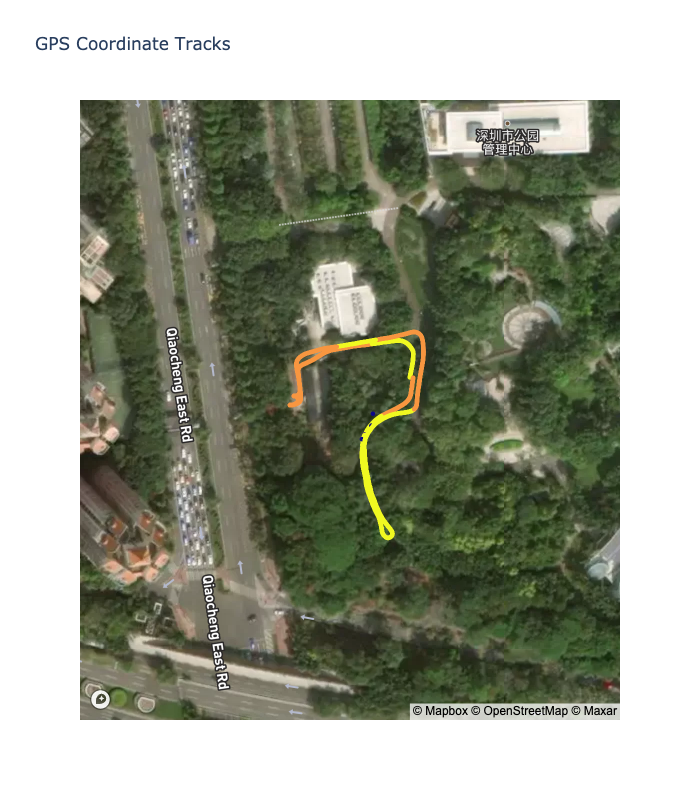

In [5]:
lat = df['gpsLat']
lon = df['gpsLon']

# Create a scattermapbox trace
trace = go.Scattermapbox(
    lat=lat,
    lon=lon,
    mode="markers",
    marker=go.scattermapbox.Marker(
        size=5, 
        color=df['gpsQF']
    )
)

# Create the layout for the plot
layout = go.Layout(
    title="GPS Coordinate Tracks",
    autosize=True,
    height=800,
    mapbox=dict(
        style="satellite-streets",
        accesstoken=mapbox_token,
        center=dict(
            lat=lat.mean(), 
            lon=lon.mean()
        ),
        zoom=17
    )
)

# Create a figure
fig = go.Figure(data=[trace], layout=layout)

# Plot the figure
fig.show()

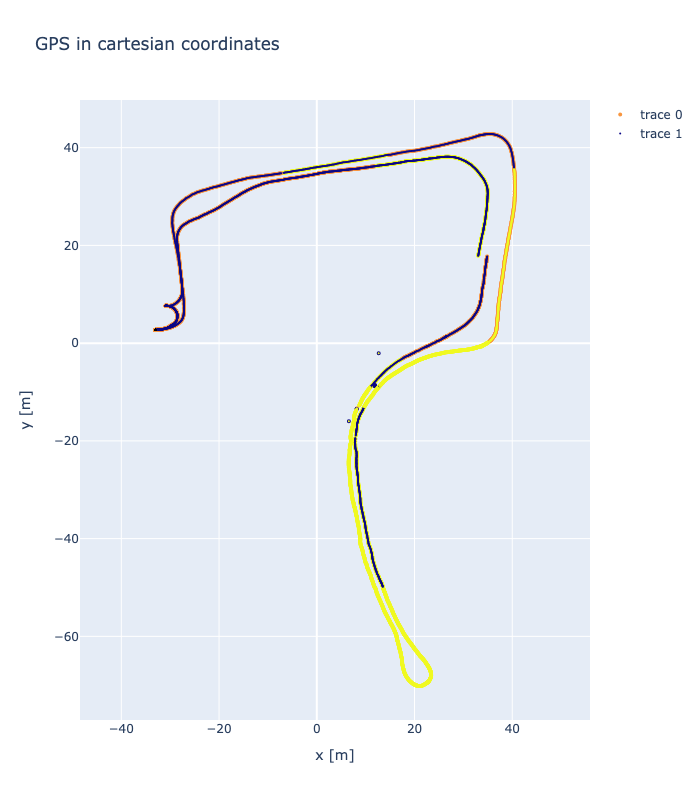

In [6]:
# Create scatter traces
trace1 = go.Scatter(
    x=df['gpsX'],
    y=df['gpsY'],
    mode='markers',
    marker=dict(
        size=4,
        color=df['gpsQF']
    )
)

trace2 = go.Scatter(
    x=df['gpsX'],
    y=df['gpsY'],
    mode='markers',
    marker=dict(
        size=2,
        color=dfTRA['gpsQF']
    )
)

# Create the layout
layout = go.Layout(
    title='GPS in cartesian coordinates',
    height=800,
    xaxis=dict(title='x [m]', scaleanchor='y'),
    yaxis=dict(title='y [m]')
)

# Create the figure and add the traces
fig = go.Figure(data=[trace1, trace2], layout=layout)

# Plot the figure
fig.show()

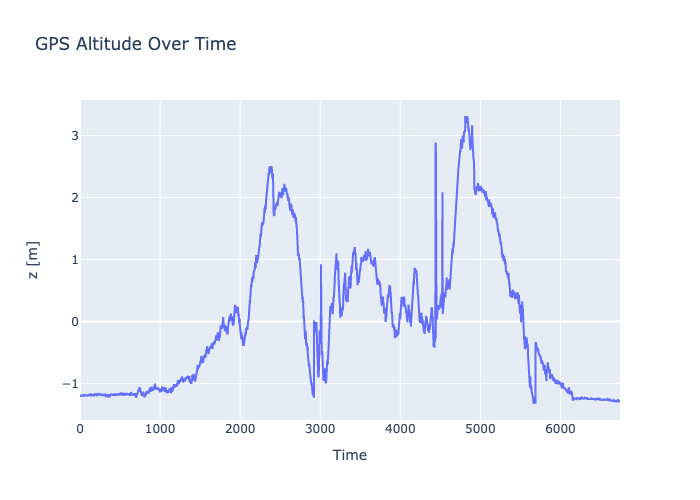

In [7]:
# Create a trace for altitude
trace = go.Scatter(
    y=df['gpsH'],
    mode='lines',
    name='Height'
)

# Create the layout
layout = go.Layout(
    title='GPS Altitude Over Time',
    xaxis=dict(title='Time'),
    yaxis=dict(title='z [m]')
)

# Create the figure and add the trace
fig = go.Figure(data=[trace], layout=layout)

# Plot the figure
fig.show()